# Phong Hoang - Learning Management System Analytics 

## Introduction

**Learning management system (LMS)** is a software application for the administration, documentration, tracking, implementing, assessing a specific learning process. The LMS utilized the eLearning concept and consists of two fundamental elements: a server that setups for the base functionality and a user interface that is used by teachers, students, and managers. For instructors, a learning management system provides an alternative way to create and deliver course material as well as assess student performance. For students, LMS offers them the ability to use interactive features such as threaded discussions, video conferencing, and discussion forums. Last but not least, the management team is able to identify training, analyze data and determining insightful information. Especially, LMSs are designed to be more focused on online learning delivery, acting as a platform of online content for both asynchronous based and synchronous based. To elaborate on Learning Management System, this project will use the [Learning Analytics DataSet](https://analyse.kmi.open.ac.uk/open_dataset) of Open University (OULAD) contains data of courses, students, and their interactions with Virtual Learning Environment (VLE).

This paper will tackle down the question of: "What factors explain the final results of students from seven selected courses?"
Besides some fields which have a high chance of affecting the final result such as `sum_click` - the number of times a student interact with the material in that day or `num_of_prev_attempts` - the number times the student has attempted this module. Furthurmore, there are many factors that influence the student's result; therefore, in order to fully explain the project's capstone, we will have a set of smaller, more manageable questions to test the relationship of the variable and the final result as follow:
<ul>
<li>Where do students comes from? What is the distribution of the result in each regions?</li>
<li>Does gender affects to the score of students, a direct factor to their final result?</li>
<li>Does the date of student’s interaction with the material relate to their score? </li>
</ul>

Our final purpose is to build a data frame with appropriate field to train a model and be able to classify student's final result.

The following lists are the publicly available data set that I will use to address my research question:
<ul> 
<li>Focal Data: Learning Analytics DataSet by Open University (OULAD) </li>
</ul>

## Ethical Considerations

When working with this kind of data, we should be mindful of whether the source of these data acknowledge that their information is being disclosed and used for what purpose. We also need to think about whether the data is being taken out of context or not. Therefore, in this analysis, some potential stakeholders are the Open University or the online educational institutions because their personal information is being used publicly. This analysis may commit a breach of privacy of the individuals whose information is used. As for the source, there might be a chance that some sources are not trustworthy. For instance,the Open Universirty want to increase their attraction to students may exaggerate its numbers, specially the number of students pass the courses. There is also a potential that our analysis takes data out of context and becomes misleading. As a result, our analysis may not accurately represent what’s actually happening.


## Discussing of potential factors for predicting the student result

The following lists are the publicly available data set that I will use to address my research question:
<ul>
<li>date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation. The earlier a student register for a course, the more passionate for the course he or she has; thus, increase the chance of passing the course. 

<li> num_of_prev_attempts – the number of times the student has attempted this module. The more attempts students have, the more familiar they will be, increase the chance they get through the course. Besides, who wants to lose their money twice?.
    
<li>studied_credits – the total number of credits for the modules the student is currently studying. The more credits a student takes at the same time, the less time he or she has for a specific course, so he or she will be more likely to be failed or withdrawn.
    
<li>imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation. Maybe living in a good condition will allow students to be more focused on their studying, and vice versa.

<li>highest_education – highest student education level on entry to the module presentation. Higher education is the ability for learning and thus, have a higher chance of completing the course
    
<li>age_band – band of the student’s age. The ability to study among ages is different, affecting directly to the final result.
score – the student’s score in this assessment. From this, we generated a new variable called weighted_score which calculate student's score based on the exam's weight.
 
<li>sum_click – the number of times a student interacts with the material in that day. From this, we generated a new variable called total_click_per_student which calculates the total student's click on all assignments. That number will reflect student's attention to the material, and it is a great predictor for their result
    
<li>ontime_submission_rate - the percentage student submits their assignments late. This is a new variable to classify student's results. An ontime_submission is defined as the date_submitted is smaller than the date(information about the final submission date of the assessment). The rate is calculated as the total on-time submission divides by the total of assessment.

</ul>

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

## Importing Data Sets

In [2]:
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentinfo = pd.read_csv('studentinfo.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')
studentVle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')

## Create new variables

### Weighted_Score

In [3]:
Assessment_Score = pd.merge(assessments, studentAssessment, on=['id_assessment'])
Assessment_Score['weight*score'] = Assessment_Score['weight']*Assessment_Score['score']
Total_Score = Assessment_Score.groupby(['id_student', 'code_module', 'code_presentation'])\
.agg(weightByScore = ('weight*score', sum)).reset_index()
Total_Weight = assessments.groupby(['code_module', 'code_presentation']).agg(total_weight = ('weight', sum)).reset_index()
Score_Weights = pd.merge(Total_Score, Total_Weight, on=['code_module', 'code_presentation'])
Score_Weights['weighted_score'] = Score_Weights['weightByScore'] / Score_Weights['total_weight']
Score_Weights.drop(columns=['weightByScore', 'total_weight'], inplace=True)
Score_Weights

,id_student,code_module,code_presentation,weighted_score
0,6516,AAA,2014J,31.75
1,24734,AAA,2014J,23.75
2,26192,AAA,2014J,43.15
3,28061,AAA,2014J,38.70
4,31600,AAA,2014J,27.75
...,...,...,...,...
25838,2654928,EEE,2014J,41.86
25839,2663195,EEE,2014J,42.00
25840,2681277,EEE,2014J,7.60
25841,2686053,EEE,2014J,43.56


### Total_Click 

In [4]:
Student_Material = pd.merge(vle, studentVle)
Total_Click = Student_Material.groupby(['code_module', 'code_presentation', 'id_student']).agg(total_click = ("sum_click",sum)).reset_index()
Total_Click

,code_module,code_presentation,id_student,total_click
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034
...,...,...,...,...
29223,GGG,2014J,2640965,41
29224,GGG,2014J,2645731,893
29225,GGG,2014J,2648187,312
29226,GGG,2014J,2679821,275


### Ontime_Submission_Rate

In [5]:
Assessment_Score['Difference'] = Assessment_Score['date'] - Assessment_Score['date_submitted']
Assessment_Score['OnTime'] = np.where(Assessment_Score['Difference'] > 0, True, False)
Assessment_Score

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,weight*score,Difference,OnTime
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0,780.0,1.0,True
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0,700.0,-3.0,False
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0,720.0,2.0,True
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0,690.0,-7.0,False
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0,790.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0,0.0,1.0,True
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0,0.0,-3.0,False
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0,0.0,-14.0,False
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0,0.0,2.0,True


In [6]:
Total_Ontime = Assessment_Score.groupby(['id_student', 'code_module', 'code_presentation']).agg(total_ontime = ('OnTime', sum)).reset_index()
Total_Assignments = Assessment_Score[['id_student', 'code_module', 'code_presentation', 'id_assessment']].groupby(['id_student', 'code_module', 'code_presentation']).size().reset_index(name='total_assessments')
Ontime_Rate = pd.merge(Total_Ontime,Total_Assignments)
Ontime_Rate['ontime_submission_rate'] = Ontime_Rate['total_ontime']/ Ontime_Rate['total_assessments']
Ontime_Rate.drop(columns=['total_ontime', 'total_assessments'],inplace=True)
Ontime_Rate

,id_student,code_module,code_presentation,ontime_submission_rate
0,6516,AAA,2014J,1.000000
1,8462,DDD,2013J,0.666667
2,8462,DDD,2014J,1.000000
3,11391,AAA,2013J,1.000000
4,23629,BBB,2013B,0.250000
...,...,...,...,...
25838,2698257,AAA,2013J,0.000000
25839,2698535,CCC,2014B,0.000000
25840,2698535,EEE,2013J,0.500000
25841,2698577,BBB,2014J,0.600000


In [7]:
Focal_Data = pd.merge(Ontime_Rate,Total_Click, how = 'inner')
Focal_Data = pd.merge(Focal_Data,Score_Weights)
Focal_Data

,id_student,code_module,code_presentation,ontime_submission_rate,total_click,weighted_score
0,6516,AAA,2014J,1.000000,2791,31.750000
1,8462,DDD,2013J,0.666667,646,17.450000
2,8462,DDD,2014J,1.000000,10,21.500000
3,11391,AAA,2013J,1.000000,934,41.200000
4,23629,BBB,2013B,0.250000,161,8.345000
...,...,...,...,...,...,...
25788,2698257,AAA,2013J,0.000000,758,34.700000
25789,2698535,CCC,2014B,0.000000,786,3.123333
25790,2698535,EEE,2013J,0.500000,3455,26.720000
25791,2698577,BBB,2014J,0.600000,717,27.900000


## The Summary of Finding other Factors

### Final result by regions

In [8]:
studentinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


array([[<AxesSubplot:title={'center':'id_student'}>,
        <AxesSubplot:title={'center':'num_of_prev_attempts'}>],
       [<AxesSubplot:title={'center':'studied_credits'}>, <AxesSubplot:>]],
      dtype=object)

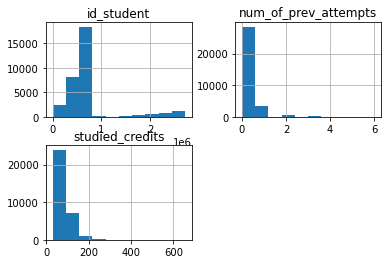

In [9]:
studentinfo.hist()

In [10]:
studentinfo['region'].value_counts()

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

In [11]:
studentinfo['region'].nunique()

13

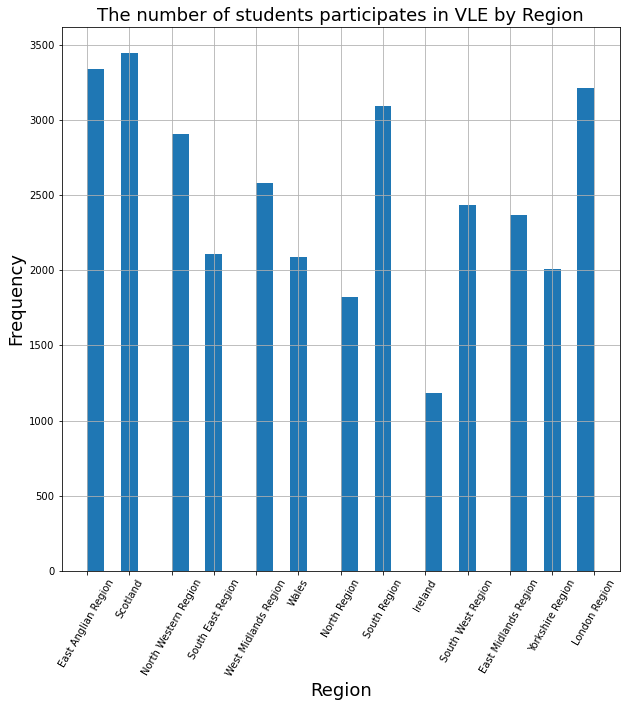

In [12]:
studentinfo['region'].hist(bins = 30, figsize=(10,10))
plt.xticks(rotation=60)
plt.title("The number of students participates in VLE by Region", fontsize=18)
plt.xlabel('Region',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)
plt.show()

We start addressing the first question by identifying the regions where the student from. There are 13 regions which participate in this VLE, and all of them contribute a fair amount of students, with the only exception may be Ireland with only 1184 student comes from. Scotland has the highest number of students who start the VLE experience, with 3446 students in total. In short, by visualizing the number of students from each region, we are making sure that there don't exist any regions that dominated the student proportions and may lead the final results to become bias. We start approaching to our question of whether the region contribute to the difference in the final result by visualizing the total number of student in each categories in each region.

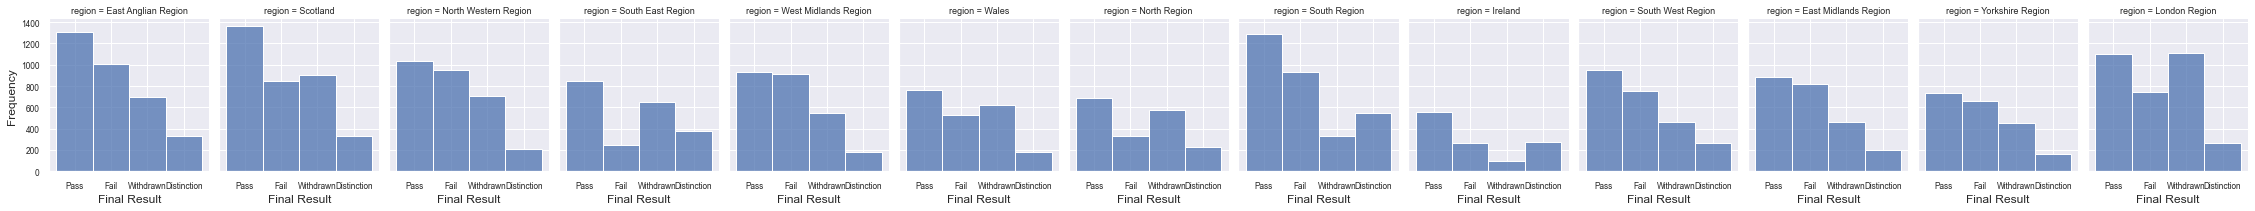

In [13]:
sns.set(font_scale = 0.75)
region_result = sns.FacetGrid(studentinfo, col="region", height=3, aspect=.8)
region_result.map(sns.histplot, "final_result")
region_result.set_axis_labels('Final Result', 'Frequency',fontsize = 12)

In [14]:
Region_result = pd.crosstab(studentinfo.region,studentinfo.final_result)

In [15]:
Region_result['PassPercentatge'] = Region_result['Pass']/(Region_result['Distinction'] + Region_result['Fail'] + Region_result['Pass'] + Region_result['Withdrawn'])
Region_result['FailPercentatge'] = Region_result['Fail']/(Region_result['Distinction'] + Region_result['Fail'] + Region_result['Pass'] + Region_result['Withdrawn'])
Region_result['WithdrawnPercentatge'] = Region_result['Withdrawn']/(Region_result['Distinction'] + Region_result['Fail'] + Region_result['Pass'] + Region_result['Withdrawn'])
Region_result['DistinctionPercentatge'] = Region_result['Distinction']/(Region_result['Distinction'] + Region_result['Fail'] + Region_result['Pass'] + Region_result['Withdrawn'])
Region_result

final_result,Distinction,Fail,Pass,Withdrawn,PassPercentatge,FailPercentatge,WithdrawnPercentatge,DistinctionPercentatge
region,,,,,,,,
East Anglian Region,327,698,1309,1006,0.391916,0.208982,0.301198,0.097904
East Midlands Region,200,462,881,822,0.372516,0.195349,0.347569,0.084567
Ireland,98,261,552,273,0.466216,0.220439,0.230574,0.082770
London Region,263,744,1099,1110,0.341729,0.231343,0.345149,0.081779
North Region,230,327,691,575,0.379046,0.179375,0.315414,0.126166
North Western Region,213,704,955,1034,0.328630,0.242257,0.355816,0.073297
Scotland,328,852,1359,907,0.394370,0.247243,0.263204,0.095183
South East Region,244,375,843,649,0.399337,0.177641,0.307437,0.115585
South Region,333,544,1287,928,0.416235,0.175938,0.300129,0.107697


In [16]:
Region_result['PassPercentatge'].std()

0.03451123076756289

In [17]:
Region_result['FailPercentatge'].std()

0.034288341626574875

In [18]:
Region_result['WithdrawnPercentatge'].std()

0.039886482336328015

In [19]:
Region_result['DistinctionPercentatge'].std()

0.017003812826712088

We are looking for the correlation between the region where students come from and their final result. Using the `value.count` function, we generate the pass, fail, withdrawn, distinction percentage of each region. Considering the standard deviation of all these categories, we can safely assume that the region is a factor which explains for the difference in the final result, but it is not the most essential factor as the standard deviation of them are relatively low (<0.04).

### Final result by Gender

In [20]:
studentinfo['gender'].value_counts()

M    17875
F    14718
Name: gender, dtype: int64

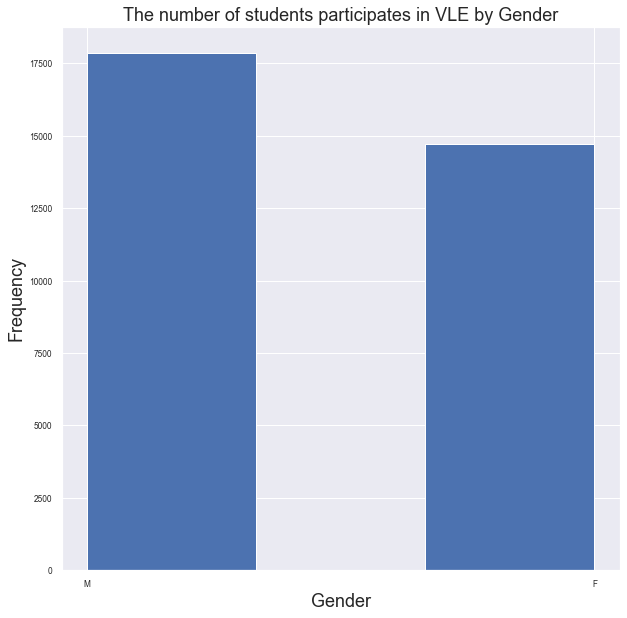

In [21]:
studentinfo['gender'].hist(bins = 3, figsize = (10,10))
plt.title("The number of students participates in VLE by Gender", fontsize=18)
plt.xlabel('Gender',fontsize=18) 
plt.ylabel('Frequency',fontsize=18)
plt.show()

Just as the Region histogram, there is no gender that dominates the student pools. To elaborate on the gender factor, we will generate the plot which describes the distribution of the final result by genders.

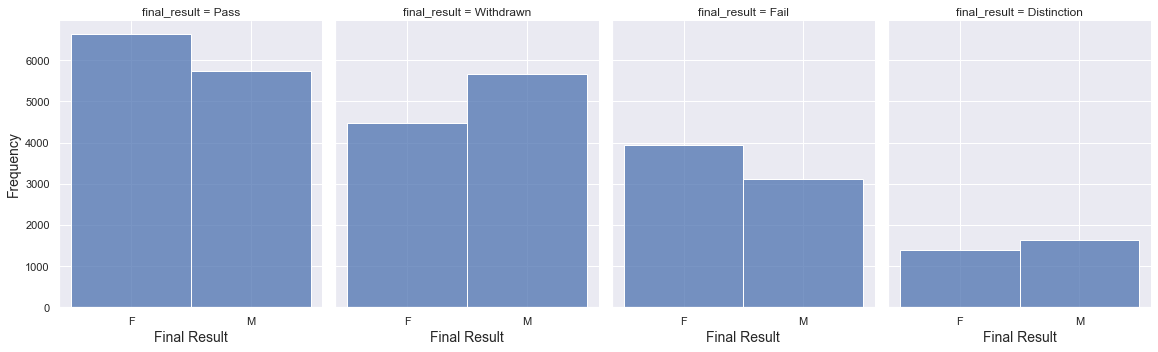

In [22]:
sns.set(font_scale = 1)
gender_result = sns.FacetGrid(studentinfo, col="final_result", height=5, aspect=0.8)
gender_result.map(sns.histplot, "gender",bins = 3)
gender_result.set_axis_labels('Final Result', 'Frequency',fontsize = 14)

From the graph itself, clearly there is not a huge difference between genders. We will further strenghthen on this by calculating some statistical numbers.

In [23]:
Gender_result = pd.crosstab(studentinfo.gender,studentinfo.final_result)
Gender_result['PassPercentatge'] = Gender_result['Pass']/(Gender_result['Distinction'] + Gender_result['Fail'] + Gender_result['Pass'] + Gender_result['Withdrawn'])
Gender_result['FailPercentatge'] = Gender_result['Fail']/(Gender_result['Distinction'] + Gender_result['Fail'] + Gender_result['Pass'] + Gender_result['Withdrawn'])
Gender_result['WithdrawnPercentatge'] = Gender_result['Withdrawn']/(Gender_result['Distinction'] + Gender_result['Fail'] + Gender_result['Pass'] + Gender_result['Withdrawn'])
Gender_result['DistinctionPercentatge'] = Gender_result['Distinction']/(Gender_result['Distinction'] + Gender_result['Fail'] + Gender_result['Pass'] + Gender_result['Withdrawn'])
Gender_result

final_result,Distinction,Fail,Pass,Withdrawn,PassPercentatge,FailPercentatge,WithdrawnPercentatge,DistinctionPercentatge
gender,,,,,,,,
F,1394,3103,5735,4486,0.389659,0.210830,0.304797,0.094714
M,1630,3949,6626,5670,0.370685,0.220923,0.317203,0.091189


We are looking for the correlation between the gender of students and their final result. Using the `value.count` function, we generate the pass, fail, withdrawn, distinction percentage of each gender. From the result we obtain, it looks like gender does not contribute much to the difference in final result. We will run a statistical test of student gender and their score to clarify our assumption.

Text(0.5, 1.0, 'Distribution of Scores Each Gender')

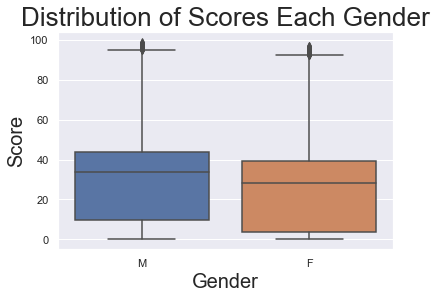

In [24]:
gender_score = pd.merge(studentinfo, Score_Weights)
Gender_Score = sns.boxplot(x="gender", y="weighted_score", data=gender_score)
Gender_Score.set_xlabel("Gender", fontsize=20)
Gender_Score.set_ylabel("Score", fontsize=20)
Gender_Score.axes.set_title("Distribution of Scores Each Gender", fontsize=26)

In [25]:
df1 = pd.merge(studentinfo, studentAssessment)
male_df = df1[df1['gender'] == 'M']
female_df = df1[df1['gender'] == 'F']

In [26]:
from numpy import sqrt, abs, round
from scipy.stats import norm
se_male=male_df.std()['score']/np.sqrt(17875)
se_female=female_df.std()['score']/np.sqrt(14718)
sed=np.sqrt((se_male**2) + (se_female**2))
Z_stat=(male_df['score'].mean() - female_df['score'].mean())/sed
pval = 2*(norm.sf(abs(Z_stat)))
print("Z_stat: ", Z_stat, "p-value: ", pval)

Z_stat:  -1.7887450631310993 p-value:  0.07365588203135552


As Pau Balart & Matthijs Oosterveen demonstrated in [Females show more sustained performance during test-taking than males](https://www.nature.com/articles/s41467-019-11691-y), female students tend to have a better average score than male students. Using our data, we will check this assumption.

This is the boxplot represent the test score between genders. From this graph, it seems like different genders will not make a score. To test this claim, we conduct an Z-test for comparing two means with the null hypothesis is there is no significant difference in the mean score between genders and the alternative hypothesis is there is significant difference in the mean score between genders.

The p-value of the test is 0.07365588203135552, which is more than the significance level alpha = 0.05. It does not indicate strong evidence against the null hypothesis, as there is more than a 5% probability the null is correct (and the results are random). Therefore, we don't reject the null hypothesis with f statistic is 23.531099310464516 and conclude that gender has barely effect to student's score, the determiner for their final result.

### Student's interaction

In [27]:
Date_Interaction = studentVle.groupby(['code_module', 'code_presentation', 'id_student']).agg(Interaction = ("date", np.mean)).reset_index()
Date_Interaction

,code_module,code_presentation,id_student,Interaction
0,AAA,2013J,11391,102.132653
1,AAA,2013J,28400,86.993023
2,AAA,2013J,30268,2.355263
3,AAA,2013J,31604,106.147813
4,AAA,2013J,32885,91.934659
...,...,...,...,...
29223,GGG,2014J,2640965,14.368421
29224,GGG,2014J,2645731,142.928270
29225,GGG,2014J,2648187,128.981481
29226,GGG,2014J,2679821,36.721311


In [28]:
Interaction_Score = pd.merge(Score_Weights, Date_Interaction)
Interaction_Score

,id_student,code_module,code_presentation,weighted_score,Interaction
0,6516,AAA,2014J,31.75,110.483384
1,24734,AAA,2014J,23.75,125.204348
2,26192,AAA,2014J,43.15,91.250379
3,28061,AAA,2014J,38.70,87.719457
4,31600,AAA,2014J,27.75,97.500000
...,...,...,...,...,...
25788,2654928,EEE,2014J,41.86,85.256351
25789,2663195,EEE,2014J,42.00,111.426282
25790,2681277,EEE,2014J,7.60,17.275862
25791,2686053,EEE,2014J,43.56,110.909988


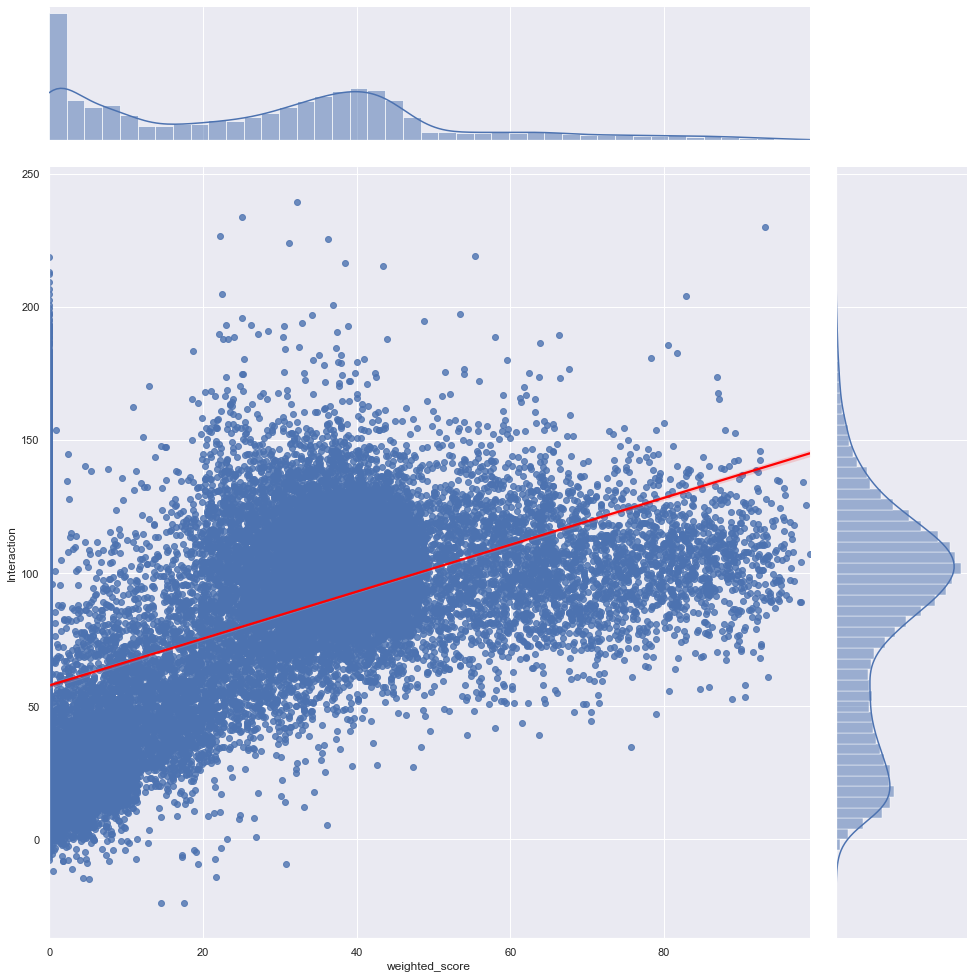

In [29]:
g=sns.jointplot(x="weighted_score", y="Interaction", data=Interaction_Score, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})
g.fig.set_size_inches(15,15)

In [30]:
Interaction_Score['Interaction'].corr(Interaction_Score['weighted_score'])

0.4851643765665272

This is the scatter plots with a line regression representing the relationship between the date interaction and its weighted score. From the graph, it seems like there is a positive relationship between these two variables. When calculating the correlation between two variables, we generate a correlation of 0.49, which means the date of interaction affects directly to the total weighted score, which is an esstial factors for the final result.

## Classification

### Data Processing

#### Generating our training set

In [31]:
Focal_Data = pd.merge(Focal_Data, Interaction_Score)
Focal_Data = pd.merge(Focal_Data, studentinfo)
Focal_Data.drop(columns=['id_student', 'code_module', 'code_presentation', 'gender','region', 'disability'], inplace=True)
Focal_Data.head()

,ontime_submission_rate,total_click,weighted_score,Interaction,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,final_result
0,1.000000,2791,31.750,110.483384,HE Qualification,80-90%,55<=,0,60,Pass
1,0.666667,646,17.450,37.490000,HE Qualification,30-40%,55<=,0,90,Withdrawn
2,1.000000,10,21.500,10.000000,HE Qualification,30-40%,55<=,1,60,Withdrawn
3,1.000000,934,41.200,102.132653,HE Qualification,90-100%,55<=,0,240,Pass
4,0.250000,161,8.345,43.033898,Lower Than A Level,20-30%,0-35,2,60,Fail


In [32]:
Focal_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25793 entries, 0 to 25792
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ontime_submission_rate  25793 non-null  float64
 1   total_click             25793 non-null  int64  
 2   weighted_score          25793 non-null  float64
 3   Interaction             25793 non-null  float64
 4   highest_education       25793 non-null  object 
 5   imd_band                24796 non-null  object 
 6   age_band                25793 non-null  object 
 7   num_of_prev_attempts    25793 non-null  int64  
 8   studied_credits         25793 non-null  int64  
 9   final_result            25793 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.2+ MB


In [33]:
Focal_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ontime_submission_rate,25793.0,0.488857,0.375194,0.0,0.111111,0.500000,0.857143,1.00000
total_click,25793.0,1522.873028,1778.435282,1.0,392.000000,907.000000,1991.000000,24139.00000
weighted_score,25793.0,28.881480,21.841824,0.0,7.855000,31.175000,42.000000,98.95000
Interaction,25793.0,83.269134,39.704516,-24.0,52.009569,92.351961,111.067831,239.66087
num_of_prev_attempts,25793.0,0.155120,0.465895,0.0,0.000000,0.000000,0.000000,6.00000
studied_credits,25793.0,76.778389,38.286432,30.0,60.000000,60.000000,90.000000,630.00000


Notice that every coloumn has 20640 rows, excepts for the `imd_band` column, which contains only 20433 rows. Therefore, this column has some missing values and we need a proper cleaning for it.

#### Visualizing the data

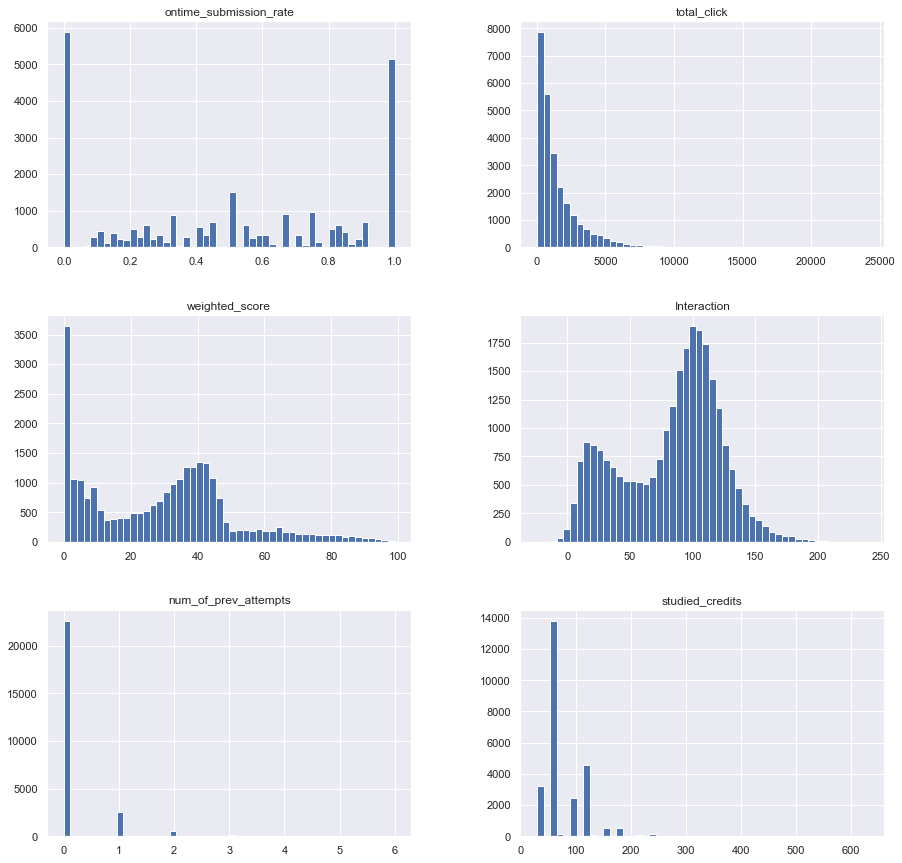

In [34]:
Focal_Data.hist(bins=50, figsize=(15,15))
plt.show()

#### Taking care of missing values

Focusing on the column of `imd_band`, we see that it is a categorical column; thus, a great way to deal with the NA value in this situation is replacing the NA value with the most frequency value of the column.

In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(Focal_Data[["imd_band"]])
Focal_Data["imd_band"] = imputer.transform(Focal_Data[["imd_band"]])

In [36]:
Focal_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25793 entries, 0 to 25792
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ontime_submission_rate  25793 non-null  float64
 1   total_click             25793 non-null  int64  
 2   weighted_score          25793 non-null  float64
 3   Interaction             25793 non-null  float64
 4   highest_education       25793 non-null  object 
 5   imd_band                25793 non-null  object 
 6   age_band                25793 non-null  object 
 7   num_of_prev_attempts    25793 non-null  int64  
 8   studied_credits         25793 non-null  int64  
 9   final_result            25793 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 2.2+ MB


We check again the number of non-null values in the `imd_band` to see our replacement code correct. It appears that the column now is containing 25799  values, which means our missing values have been filled.



#### Seperating the independent values and dependent values

#### Encoding the data

When we check the information of the data again, the `imd_band` and `age_band` has the data type of non-number, creating problems when we try to train a model for our data set. Take a closer look at these two columns:

In [37]:
Focal_Data['imd_band'].value_counts()

30-40%     3772
20-30%     2741
10-20      2604
40-50%     2549
50-60%     2541
0-10%      2423
60-70%     2384
70-80%     2379
80-90%     2264
90-100%    2136
Name: imd_band, dtype: int64

In [38]:
Focal_Data['age_band'].value_counts()

0-35     17914
35-55     7692
55<=       187
Name: age_band, dtype: int64

For both `imd_band` and `age_band` the categorical feature is ordinal; therefore, instead of OneHotEncoder, it is appropriate to use Label Enconder to handle such categorical data.

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Focal_Data['age_band'] = le.fit_transform(Focal_Data['age_band'])

In [40]:
Focal_Data['imd_band'] = le.fit_transform(Focal_Data['imd_band'])

In [41]:
X = Focal_Data.iloc[:, Focal_Data.columns != 'final_result' ].values
y = Focal_Data.iloc[:, -1].values

We have one more categorical value, which is the `highest_education` columns. As the value of this columns seems not to share any relationships, using OneHotEncoder is a proper to tranform this.

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

#### Splitting the dataset into the Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### Feature Scaling

Our columns contains a different range of values, for example the `total_clicks` columns reaching to almost 10000, while the `num_of_prev_attempts` only ranges from 0 to 6.  Such different ranges can create problem for our Machine Learning algorithm to learn and train the data, so we need to apply a feature scaling called standardization into our data set.


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Decision Tree Classification

In [45]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DecisionTreeclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
DecisionTreey_pred = DecisionTreeclassifier.predict(X_test)
DecisionTreecm = confusion_matrix(y_test, DecisionTreey_pred)
print(DecisionTreecm)
accuracy_score(y_test, DecisionTreey_pred)

[[ 298   16  287    2]
 [  28  464  244  368]
 [ 312  289 1887   33]
 [   1  386   29  515]]


0.6132971506105834

In [47]:
from sklearn.metrics import f1_score
DecisionTreef1score = f1_score(y_test, DecisionTreey_pred,average="macro")
print(DecisionTreef1score)

0.5518480299692707


#### KNN Classificaion

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
KNNy_pred = KNNclassifier.predict(X_test)
KNNcm = confusion_matrix(y_test, KNNy_pred)
print(KNNcm)
accuracy_score(y_test, KNNy_pred)

[[ 145   17  441    0]
 [  16  430  315  343]
 [ 270  164 2080    7]
 [   3  340   41  547]]


0.6206629191703819

In [50]:
KNNf1score = f1_score(y_test, KNNy_pred,average="macro")
print(KNNf1score)

0.5168170996770076


#### Random Forest Classification

In [51]:
from sklearn.ensemble import RandomForestClassifier
RandomForestclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RandomForestclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [52]:
RandomForesty_pred = RandomForestclassifier.predict(X_test)
RandomForestcm = confusion_matrix(y_test, RandomForesty_pred)
print(RandomForestcm)
accuracy_score(y_test, RandomForesty_pred)

[[ 245    4  354    0]
 [   6  511  287  300]
 [ 214  138 2164    5]
 [   3  418   30  480]]


0.6590424500872262

In [53]:
RandomForestf1_score = f1_score(y_test, RandomForesty_pred,average="macro")
print(RandomForestf1_score)

0.5737269193670462


#### Logistics Regression Classification

In [54]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionclassifier = LogisticRegression(random_state = 0)
LogisticRegressionclassifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [55]:
LogisticRegressiony_pred = LogisticRegressionclassifier.predict(X_test)
LogisticRegressioncm = confusion_matrix(y_test, LogisticRegressiony_pred)
print(LogisticRegressioncm)
accuracy_score(y_test, LogisticRegressiony_pred)

[[  21    9  573    0]
 [   0  407  320  377]
 [  22  126 2372    1]
 [   0  285   34  612]]


0.6613684822640047

In [56]:
LogisticRegressionf1_score = f1_score(y_test, LogisticRegressiony_pred,average="macro")
print(LogisticRegressionf1_score)

0.48471178455669384


#### Naive Bayes Classification

In [57]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

GaussianNB()

In [58]:
NBy_pred = NBclassifier.predict(X_test)
NBcm = confusion_matrix(y_test, NBy_pred)
print(NBcm)
accuracy_score(y_test, NBy_pred)

[[  98   28  477    0]
 [  13  306  290  495]
 [ 144  279 2097    1]
 [   8  164   43  716]]


0.6235704593913549

In [59]:
NBf1score = f1_score(y_test, NBy_pred,average="macro")
print(NBf1score)

0.49814229870057447


#### Model Selection

Random Forest Tree classifier model performed the best. Although its accuracy score is the highest among these models, but the accuracy score is not such an appropriate measurement for model evulation, as it only reflect the percentage the models predicts correctly. Furthermore, its accuracy score is very near the highest - KNN (0.659 and 0.661). The determining factor for us to choose the Random Forest Tree classifier model is its f1 - score. F1 - score is the harmony variable, generating from the true positive, false negative, false positive rate of the confusion matrix, which the Random Forest Tree classifier scores the highest (0.5737269193670462)

#### Applying Grid Search to find the best model and the best parameters

In [60]:
from sklearn.model_selection import GridSearchCV
parameters = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
grid_search = GridSearchCV(estimator = RandomForestclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 68.69 %
Best Parameters: {'max_features': 6, 'n_estimators': 30}


In [61]:
RandomForestclassifier = RandomForestClassifier(n_estimators = 30, max_features = 6, random_state = 0)
RandomForestclassifier.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=30, random_state=0)

In [62]:
RandomForesty_pred = RandomForestclassifier.predict(X_test)
RandomForestcm = confusion_matrix(y_test, RandomForesty_pred)
print(RandomForestcm)
accuracy_score(y_test, RandomForesty_pred)

[[ 257    2  344    0]
 [   7  469  295  333]
 [ 152  114 2249    6]
 [   0  344   30  557]]


0.684628804031789

In [63]:
RandomForestf1_score = f1_score(y_test, RandomForesty_pred,average="macro")
print(RandomForestf1_score)

0.6006340525217232


## Conclusions

After applying `grid_search` to find the best parameters for the training process, our accuracy score and f1-score have slightly improved. However, an accuracy score of 0.685 and f1-score of 0.60 is not high enough. I acknowledge that the features I discusses in the potential factors may be bias, and we need to conduct more statistical test to find the feature which are most essential and remove features that do not really contribute to the difference of the final result, just as the way I omit two feature of `gender` and `region`. If I have more time on this data set, I definately spend more time to test the potential factors by visulizing and performing statistical test. Furthermore, as it is a Data Analytics Assignment, there maybe better to have more visualizaion and find insight rather than building a model to classify the final result of students.